<a href="https://colab.research.google.com/github/taciachristy/Tacia_Christy/blob/main/Capstone_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Capstone Project — Superstore


## 1) Mount Google Drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2)Folder Proyek

In [ ]:

import os

PROJECT_DIR = '/content/drive/MyDrive/capstone-superstore'
DATA_DIR = f'{PROJECT_DIR}/data'
OUTPUT_DIR = f'{PROJECT_DIR}/outputs'

os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

print('Project dir :', PROJECT_DIR)
print('Data dir    :', DATA_DIR)
print('Output dir  :', OUTPUT_DIR)


Project dir : /content/drive/MyDrive/capstone-superstore
Data dir    : /content/drive/MyDrive/capstone-superstore/data
Output dir  : /content/drive/MyDrive/capstone-superstore/outputs


## 3) Load Data (CSV/XLSX)

In [ ]:

import pandas as pd

CSV_PATH  = f'{DATA_DIR}/Superstore.csv'

FILE_TYPE = 'csv'

if FILE_TYPE == 'csv':
    # Jika muncul error encoding, coba encoding='latin1'
    df = pd.read_csv(CSV_PATH, encoding='latin1')
elif FILE_TYPE == 'xlsx':
    df = pd.read_excel(XLSX_PATH)
else:
    raise ValueError("FILE_TYPE harus 'csv' atau 'xlsx'")

print('Ukuran data:', df.shape)
df.head()


Ukuran data: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 4) Cek Tipe Data & Missing Values

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:

import pandas as pd
pd.DataFrame({'missing': df.isna().sum()}).sort_values('missing', ascending=False).head(20)


,missing
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## 5) Basic Cleaning & Casting Tanggal

In [ ]:

import numpy as np

# Bersihkan nama kolom dari spasi-depan/belakang
df.columns = df.columns.str.strip()

# Konversi tanggal (format dataset Superstore sering dd-mm-yyyy)
for col in ['Order Date', 'Ship Date']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

# Hapus duplikat baris jika ada
if 'Row ID' in df.columns:
    df = df.drop_duplicates(subset=['Row ID'])
else:
    df = df.drop_duplicates()

# Contoh: ubah Postal Code ke string biar leading zero tidak hilang
if 'Postal Code' in df.columns:
    df['Postal Code'] = df['Postal Code'].astype(str)

# Hapus baris dengan Sales/Profit null jika ada kolomnya
need_cols = [c for c in ['Sales','Profit'] if c in df.columns]
if need_cols:
    df = df.dropna(subset=need_cols)

print('Ukuran data setelah cleaning:', df.shape)
df.head()


Ukuran data setelah cleaning: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 6) Feature Engineering

In [ ]:

# Bulan order untuk analisis tren
if 'Order Date' in df.columns:
    df['Order Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
df.head(3)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2013-11-01
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2013-11-01
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2013-06-01


## 7) Exploratory Data Analysis (EDA)

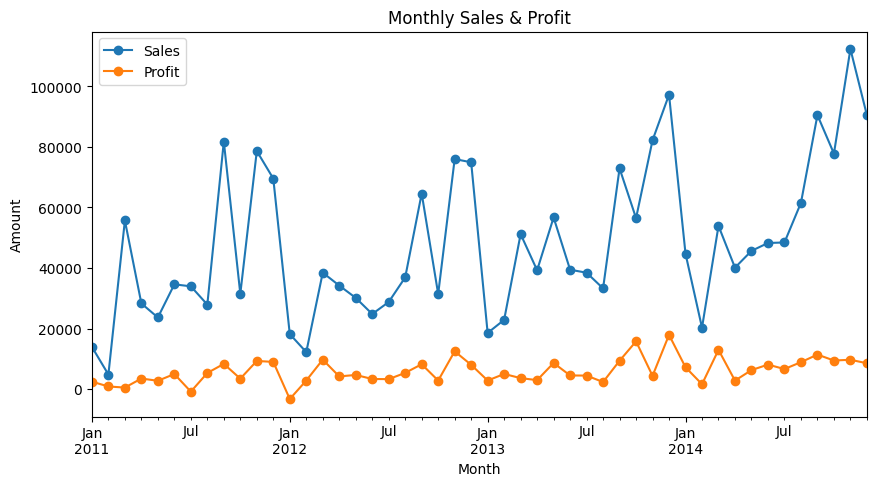

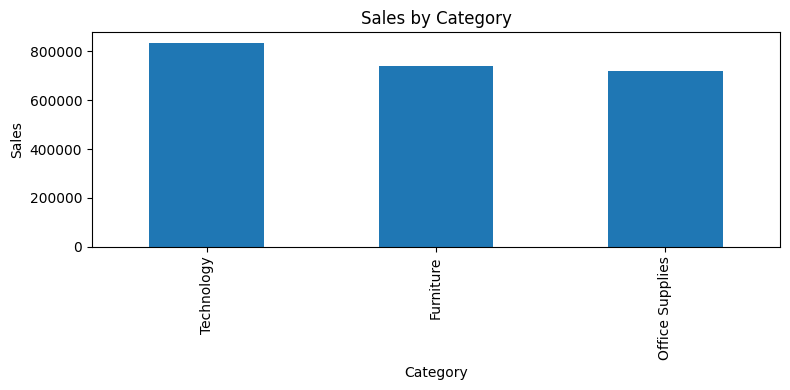

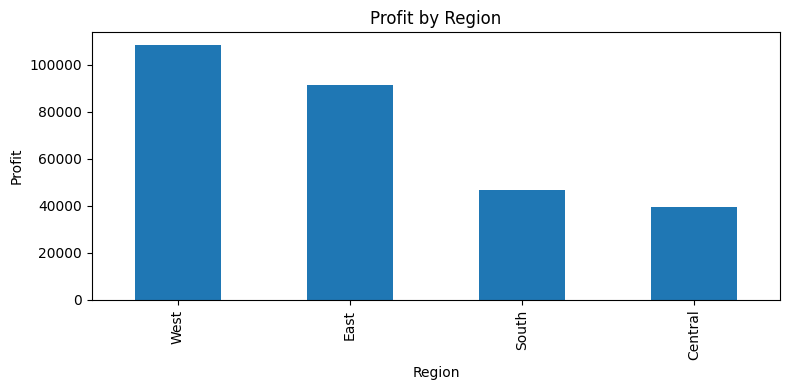

/tmp/ipython-input-2210740756.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(); plt.show()


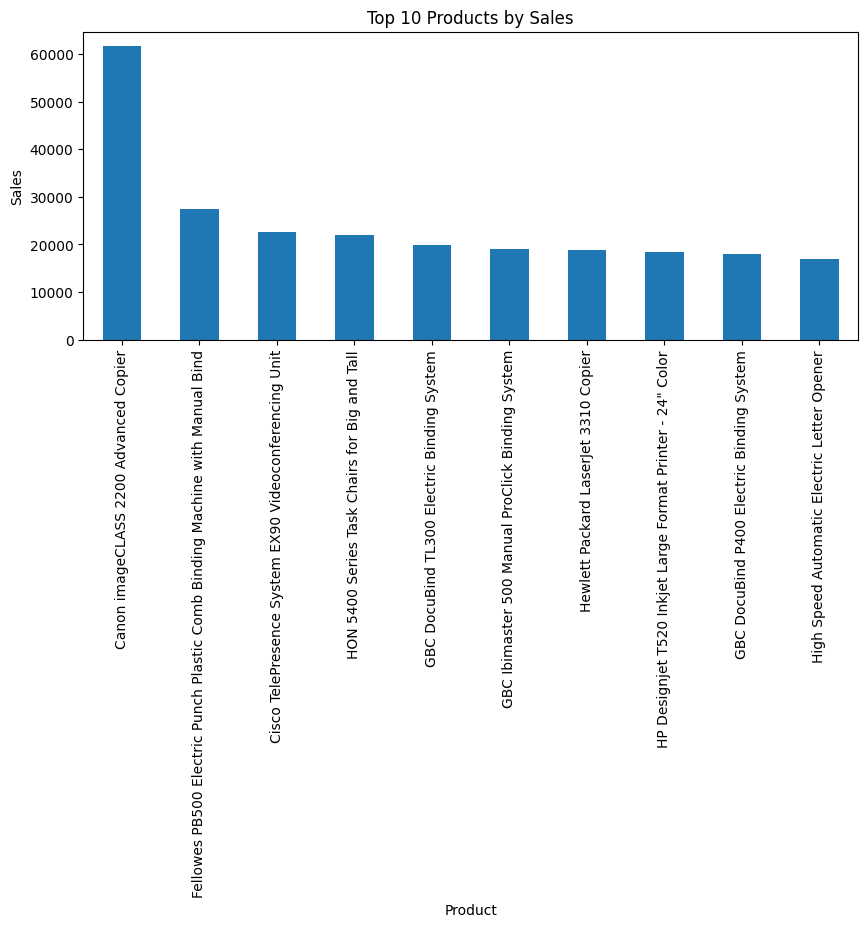

In [ ]:

import matplotlib.pyplot as plt

# 7.1 Tren bulanan sales & profit
if 'Order Month' in df.columns and 'Sales' in df.columns:
    monthly = df.groupby('Order Month', as_index=False).agg({'Sales':'sum', 'Profit':'sum'})
    ax = monthly.plot(x='Order Month', y=['Sales','Profit'], figsize=(10,5), marker='o', title='Monthly Sales & Profit')
    ax.set_xlabel('Month')
    ax.set_ylabel('Amount')
    plt.show()

# 7.2 Penjualan per kategori
if 'Category' in df.columns and 'Sales' in df.columns:
    cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    ax = cat_sales.plot(kind='bar', figsize=(8,4), title='Sales by Category')
    ax.set_xlabel('Category'); ax.set_ylabel('Sales')
    plt.tight_layout(); plt.show()

# 7.3 Profit per region
if 'Region' in df.columns and 'Profit' in df.columns:
    reg_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
    ax = reg_profit.plot(kind='bar', figsize=(8,4), title='Profit by Region')
    ax.set_xlabel('Region'); ax.set_ylabel('Profit')
    plt.tight_layout(); plt.show()

# 7.4 Top 10 produk by sales
if 'Product Name' in df.columns and 'Sales' in df.columns:
    top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
    ax = top_products.plot(kind='bar', figsize=(10,4), title='Top 10 Products by Sales')
    ax.set_xlabel('Product'); ax.set_ylabel('Sales')
    plt.tight_layout(); plt.show()


## 8) Draft Insight & Rekomendasi


- **Insight 1:** Ada masalah di profit margin - sales bisa tembus 110K namun profit hanya 18K maximal (margin cuma 16%). Penjualan naik-turun drastis tapi profit hampir flat, artinya ada inefisiensi operasional atau pricing strategy yang salah.
- **Insight 2:** Technology merupakan penjualan tertinggi namun selisihnya sedikit sekali dengan kategori lain. Hal tersebut baik pada diversifikasi risikonya, namun mengartikan belum ada kategori yang bener-bener "cash cow" untuk di-leverage maksimal.
- **Insight 3:** West region profit hampir 3x lipat Central region ini merupakan masalah besar. Kemungkinan ada masalah distribusi, kompetisi lokal, atau tim sales Central yang perlu di-revamp atau rombak total.
- **Insight 4:** Terlalu bergantung pada satu produk (Canon Copier) kalau kompetitor nyerang produk ini atau ada supply issue, langsung collapse. Produk lainnya gap-nya kejauhan.
- **Rekomendasi 1:** Audit mendalam cost structure dan pricing. Margin 16% berbahaya untuk sustainability. Mencari tahu mengapa operational cost tinggi atau harga jual terlalu rendah dibanding kompetitor.
- **Rekomendasi 2:** Kirim best performer dari West ke Central untuk knowledge transfer langsung. Jangan hanya analisis data, namun penerjunan langsung untuk fixing systematic issues di sana.
- **Rekomendasi 3:** Diversifikasi produk secepatnya dengan membuat bundling strategy atau develop alternative hero products. Canon copier dominance merupakan ticking time bomb buat business continuity.
- **Rekomendasi 4:**  Mengimplementasi regional pricing differentiation. Region West bisa handle premium pricing, namun Region Central mungkin perlu competitive pricing untuk market penetration dulu.


## 9) Simpan Data yang Sudah Dibersihkan

In [ ]:

CLEAN_PATH = f'{OUTPUT_DIR}/superstore_clean.csv'
df.to_csv(CLEAN_PATH, index=False, encoding='utf-8')
CLEAN_PATH


'/content/drive/MyDrive/capstone-superstore/outputs/superstore_clean.csv'